In [2]:
import numpy as np
import matplotlib.pyplot as plt



from skimage import data, img_as_float
from skimage.restoration import denoise_nl_means, estimate_sigma

from skimage.util import random_noise

from sklearn.metrics import mean_absolute_error
from skimage.metrics import peak_signal_noise_ratio

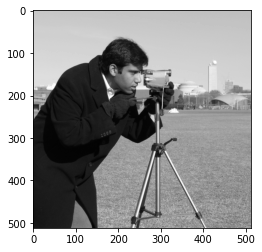

In [11]:
img_org = data.camera()
plt.imshow(img_org, cmap='gray')

## Noisy image

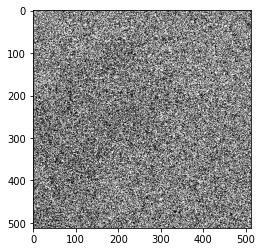

In [20]:
sigma = 5
noisy = random_noise(img_org, var=sigma**2)
plt.imshow(noisy , cmap='gray')

noisy_imgs = list()
for _ in range(100):
    noisy_imgs.append(random_noise(img_org, var=sigma**2))

## Average denoising

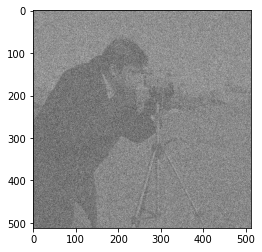

In [21]:
noisy_imgs = np.array([np.array(im) for im in noisy_imgs])
denoised = np.mean(noisy_imgs, axis=0)

plt.imshow(denoised, cmap='gray')

## 5.1-B

In [44]:
## Generate noisy images
k_vals = [8, 16, 64, 128]
sigma_vals = [0.04, 0.08]

noisy_samples = dict()
denoised_outputs = dict()

for sigma in sigma_vals:
    for k in k_vals:
        noisy_imgs = list()
        for i in range(k):
            noisy_imgs.append(random_noise(img_org, var=sigma**2))

        noisy_imgs = np.array([np.array(im) for im in noisy_imgs])
        noisy_samples[f"sigma={sigma}, k={k}"] = noisy_imgs
        
        denoised_outputs[f"sigma={sigma}, k={k}"] = (np.average(noisy_imgs,axis=0)*255).astype('uint8')

print(noisy_samples.keys())

dict_keys(['sigma=0.04, k=8', 'sigma=0.04, k=16', 'sigma=0.04, k=64', 'sigma=0.04, k=128', 'sigma=0.08, k=8', 'sigma=0.08, k=16', 'sigma=0.08, k=64', 'sigma=0.08, k=128'])


## Compare images visually

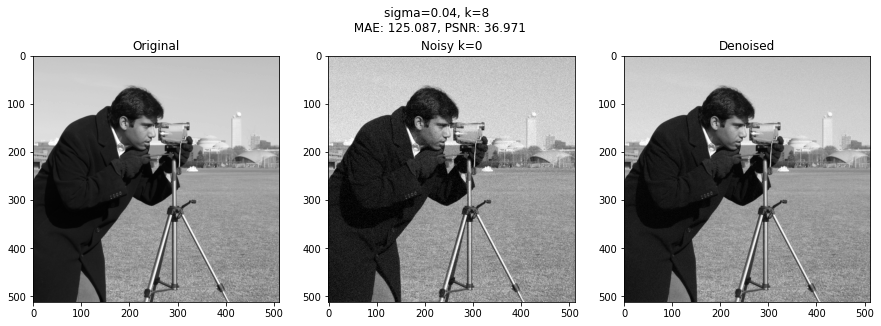

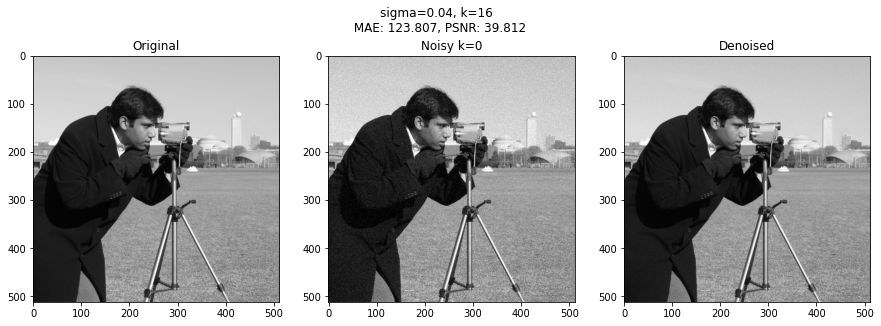

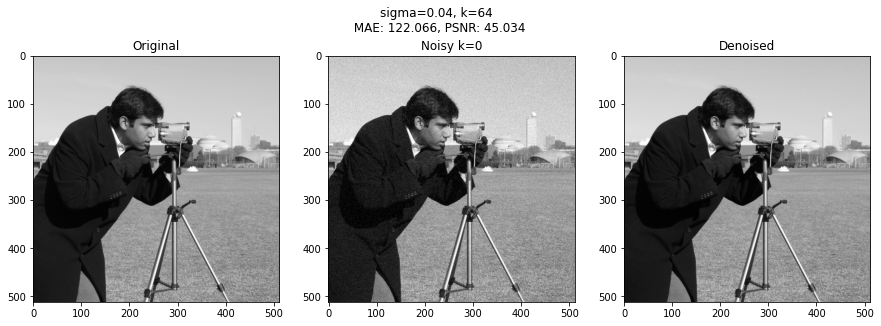

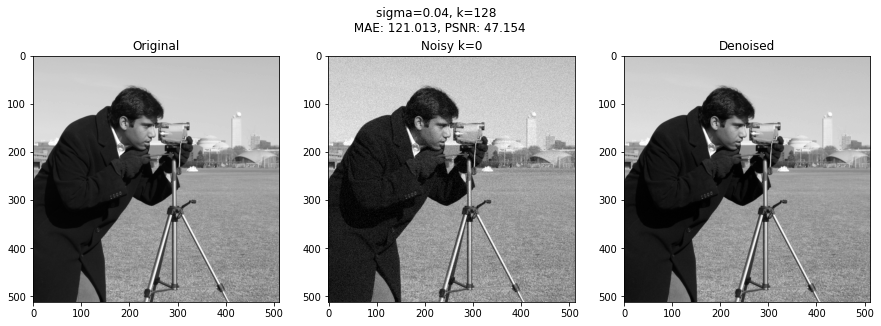

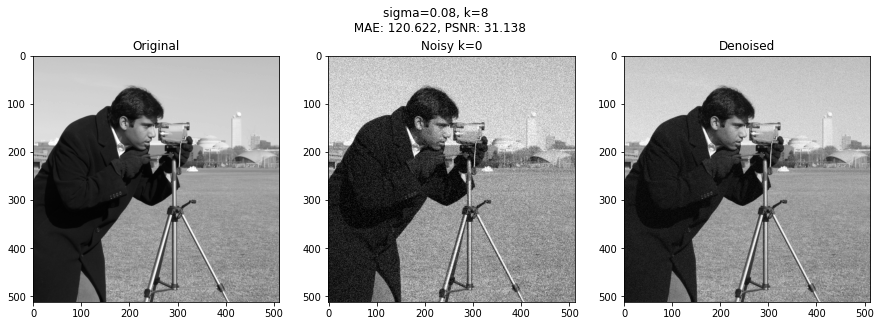

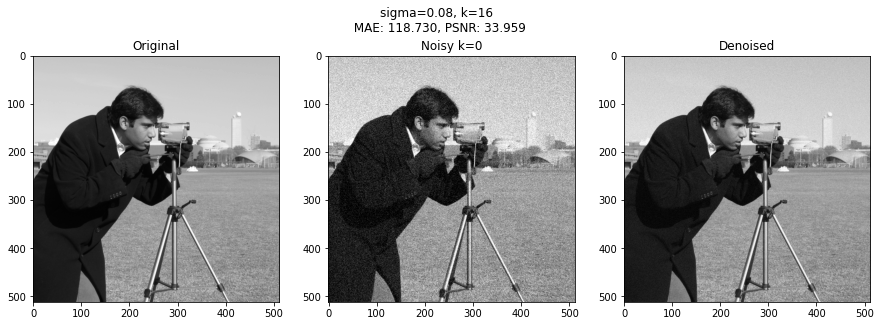

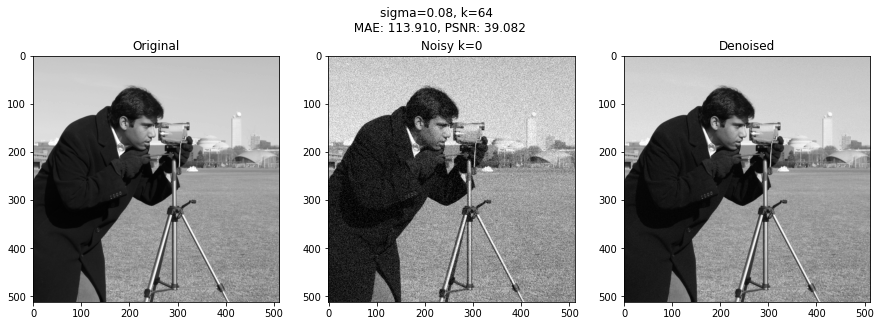

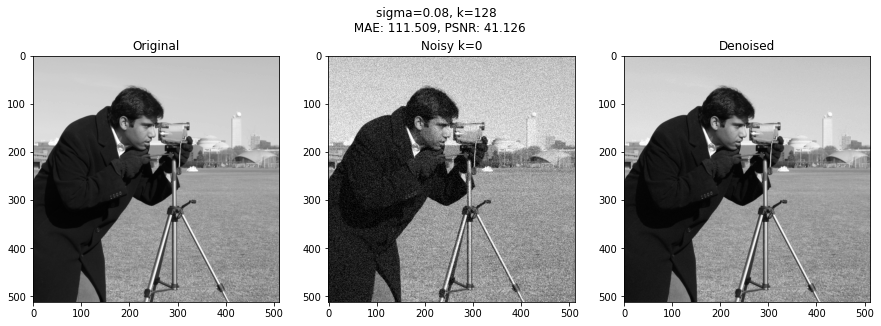

In [45]:
for sample_key in noisy_samples.keys():
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
    mae = mean_absolute_error(img_org, denoised_outputs[sample_key])
    psnr = peak_signal_noise_ratio(img_org, denoised_outputs[sample_key])
    
    fig.suptitle(f"{sample_key} \n MAE: {mae:.3f}, PSNR: {psnr:.3f}")
    
    ax1.imshow(img_org, cmap='gray')
    ax1.set_title("Original")
    
    ax2.imshow(noisy_samples[sample_key][0], cmap='gray')
    ax2.set_title("Noisy k=0")
    
    ax3.imshow(denoised_outputs[sample_key], cmap='gray')
    ax3.set_title("Denoised")
    

## Compare images metrically